In [1]:
# show all warnings

import warnings as _wrn
_wrn.filterwarnings('always')

In [134]:
# imports

import sys
import pickle as pkl
import numpy as nmp
import numpy.random as rnd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# import eQTLseq

sys.path.append('../')
import eQTLseq as seq

(50, 1000)
(1000, 100)
(50, 100)


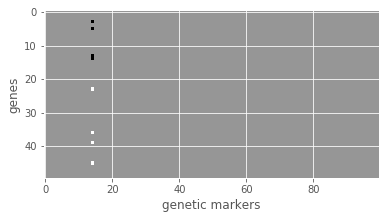

In [144]:
## load data
with open('../data/simdata_1_8_0_0.pkl', 'rb') as fh:
    data = pkl.load(fh)

Z = data['Z']     # simulated expression data
G = data['G']     # simulated genotypes
B = data['beta']  # the true matrix of gene/variant associations

## print/plot info
print(Z.shape)    # samples x genes 
print(G.shape)    # samples x genetic markers
print(B.shape)    # genes x genetic markers

plt.figure(); 
plt.imshow(B, cmap=plt.cm.Greys_r); 
plt.xlabel('genetic markers'); 
plt.ylabel('genes');

# plt.savefig('../figs/fig1.png')

In [145]:
## Estimate model
Z_norm = Z / seq.calculate_norm_factors(Z)      # normalize data
Z_trans = seq.transform_data(Z_norm, kind='log')  # transform data

rnd.seed(0)
res = seq.run(Z_trans.T, G, n_iters = 4000, burnin=0.5, model='Normal', n_threads=1, scaleG=True)

100%|██████████| 4000/4000 [00:10<00:00, 380.88it/s]


[0.79033197115175891, 0.0]


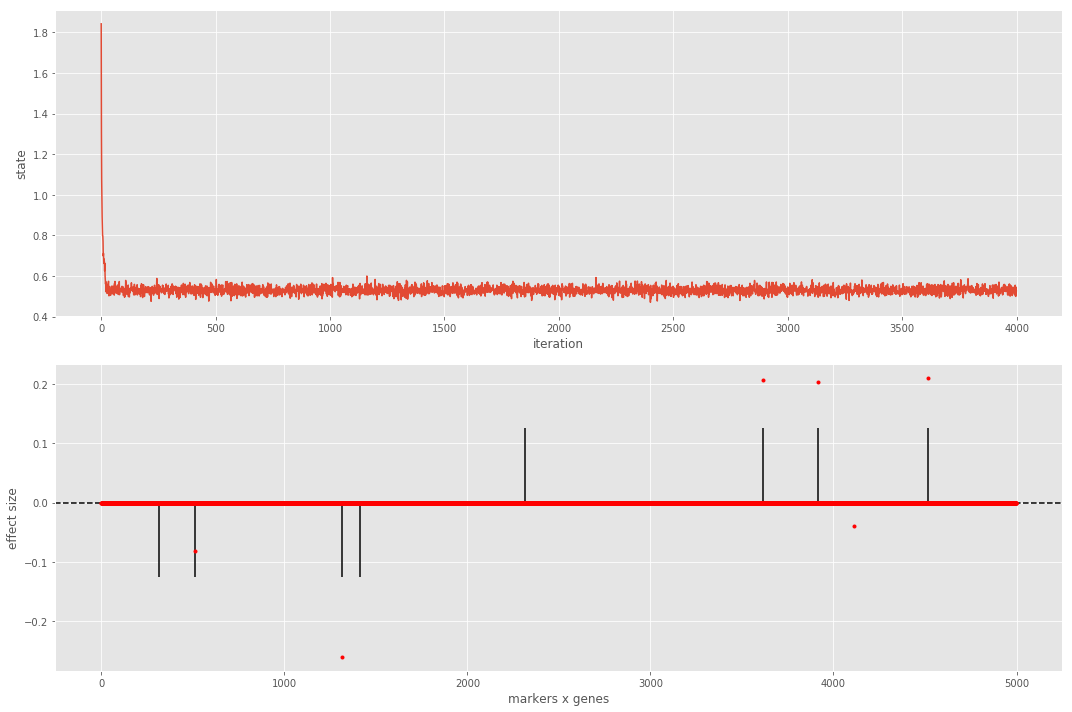

In [146]:
## normalize beta
Bhat = res['beta']
Bhat = Bhat / nmp.abs(Bhat).sum()
Bnorm = B / nmp.abs(B).sum()

## plot
plt.figure(figsize=(15,10))

plt.subplot(2,1,1); 
plt.plot(res['state'][1:]); plt.xlabel('iteration'); plt.ylabel('state')

plt.subplot(2,1,2); 
plt.vlines(range(Bnorm.size), 0, Bnorm.ravel()); 
plt.axhline(linestyle='--', color='k');
plt.plot(Bhat.ravel(), 'r.'); plt.xlabel('markers x genes'); plt.ylabel('effect size');

## compute metrics
metrics = seq.calculate_metrics(Bhat, Bnorm, beta_thr=0.25)
print([metrics[_] for _ in ('MCC', 'FDR')])

plt.tight_layout()
plt.savefig('../figs/fig3.png')

In [46]:
whos

Variable   Type              Data/Info
--------------------------------------
B          ndarray           50x100: 5000 elems, type `float64`, 40000 bytes
Bhat       ndarray           50x100: 5000 elems, type `float64`, 40000 bytes
Bnorm      ndarray           50x100: 5000 elems, type `float64`, 40000 bytes
G          ndarray           1000x100: 100000 elems, type `int64`, 800000 bytes (781.25 kb)
Z          ndarray           50x1000: 50000 elems, type `int64`, 400000 bytes (390.625 kb)
Z_norm     ndarray           50x1000: 50000 elems, type `float64`, 400000 bytes (390.625 kb)
Z_trans    ndarray           50x1000: 50000 elems, type `float64`, 400000 bytes (390.625 kb)
data       dict              n=8
fh         BufferedReader    <_io.BufferedReader name=<...>ata/simdata_2_8_0_0.pkl'>
metrics    dict              n=23
nmp        module            <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
pkl        module            <module 'pickle' from '/u<...>lib/python3.5/pickle.py'>
